# CAPSTONE 1 - Exploratory Data Analysis


In [41]:
import pandas as pd
import glob

# Read multiple files into one dataframe

allfiles = glob.glob('caldata\*.csv')
df = pd.concat((pd.read_csv(f, index_col='FL_DATE', parse_dates=True)) for f in allfiles)

print (df.columns)



C:\Users\airshu23\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  import sys


Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'FLIGHTS', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 31'],
      dtype='object')


The dataframe constructed above consists of all domestic flights that depart from or arrive at a Californian airport. The data consists of flights from 2013 through 2017. The fields are listed above.

In [42]:
df['ARR_DEL15'] = df['ARR_DEL15'].fillna(value = 0)

## All flights with a departure and/or arrival in California

In [148]:
monthly = df['ARR_DEL15'].resample('M').mean()



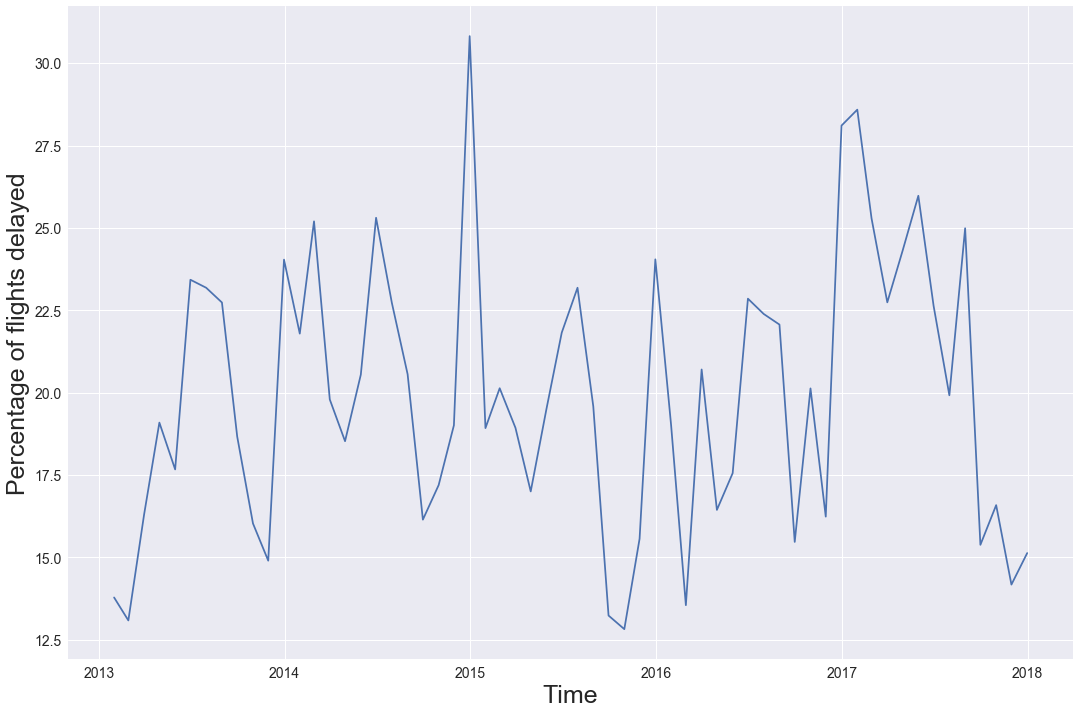

In [99]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.figure(figsize=(18,12))
plt.plot(monthly.index, monthly.values*100)
plt.xlabel('Time', fontsize = 25)
plt.ylabel('Percentage of flights delayed', fontsize = 25)
plt.xticks(fontsize= 14 )
plt.yticks(fontsize= 14 )
plt.show()

Based on the graph above, it appears that the proportions of flights that are delayed appears to be roughly cyclical. Rates seem to spike in the middle and the end of the year. 2018 seems to have been a bit of an anomaly because there was no sharp increase in delays at the end of the year. 

## Does day of week matter?



In [146]:
gb_day = df.groupby(df['DAY_OF_WEEK']).agg({'ARR_DEL15':['mean']})
gb_day.columns = ["_".join(x) for x in gb_day.columns.ravel()]


Text(0,0.5,'Day of Week')

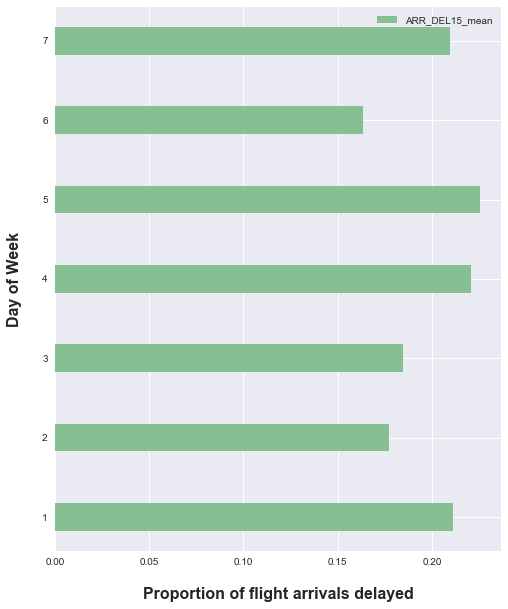

In [102]:
#plotting horizontal bar graph
ax = gb_day.plot(kind = 'barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.35)

# Set x-axis label
ax.set_xlabel("Proportion of flight arrivals delayed", labelpad=20, weight='bold', size=16)

# Set y-axis label
ax.set_ylabel("Day of Week", labelpad=20, weight='bold', size=16)

There appears to less variation in arrival delay rates when aggregated by day of week compared to monthly rates. 

## Looking deeper into the cause of arrival delay


Each delayed flight has fields to indicate the number of minutes of delay attributable to different causes. The causes are carrier delay, weather delay, national air system delay, security delay, and late aircraft. It must be noted however that weather delay only accounts for 'severe' weather.

In [106]:
#selecting only delayed flights

causes = df.loc[df['ARR_DEL15'] == 1, 'CARRIER_DELAY' : 'LATE_AIRCRAFT_DELAY']

print (causes.shape)

(1226149, 5)


In [121]:
causes.describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,1.226149e+06,1.226149e+06,1.226149e+06,1.226149e+06,1.226149e+06
mean,1.596878e+01,1.504323e+00,1.395557e+01,9.551123e-02,2.441177e+01
std,4.520401e+01,1.396801e+01,2.834291e+01,3.016573e+00,4.245434e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,1.500000e+01,0.000000e+00,1.800000e+01,0.000000e+00,3.100000e+01
max,2.142000e+03,1.312000e+03,1.605000e+03,7.120000e+02,1.756000e+03


The boxplot shown below excludes 'weather delay' and 'security delay'. They are not amenable to visualization because the 25th percentile, mean, and 75th percentile values are very low for those fields.

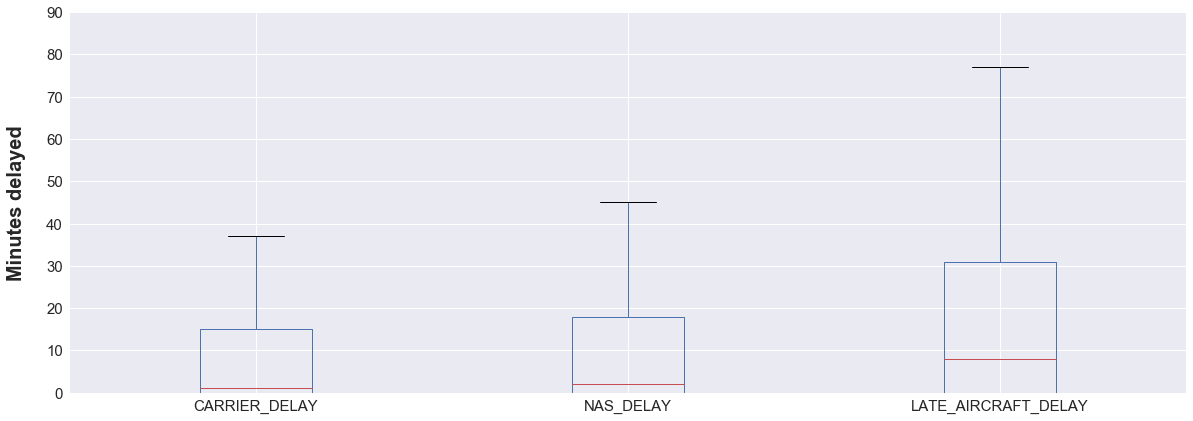

In [124]:
#creating boxplot of delay reasons

axes = causes.boxplot(column=['CARRIER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY'],
                      figsize = (20,7),  return_type='axes', fontsize=15)

axes.set_ylim(0, 90)

# Set y-axis label
axes.set_ylabel("Minutes delayed", labelpad=20, weight='bold', size=20)

plt.show()

## Looking at the three busiest airports in California


In [133]:
#all flights departing from San Francisco Int'l Airport
sf_dep = df.loc[df['ORIGIN_AIRPORT_ID'] == 14771, 'ARR_DEL15'].resample('Y').mean()

#all flights departing from Los Angeles Int'l Airport
la_dep = df.loc[df['ORIGIN_AIRPORT_ID'] == 12892, 'ARR_DEL15'].resample('Y').mean()

#all flights departing from San Diego Int'l Airport
sd_dep = df.loc[df['ORIGIN_AIRPORT_ID'] == 14679, 'ARR_DEL15'].resample('Y').mean()


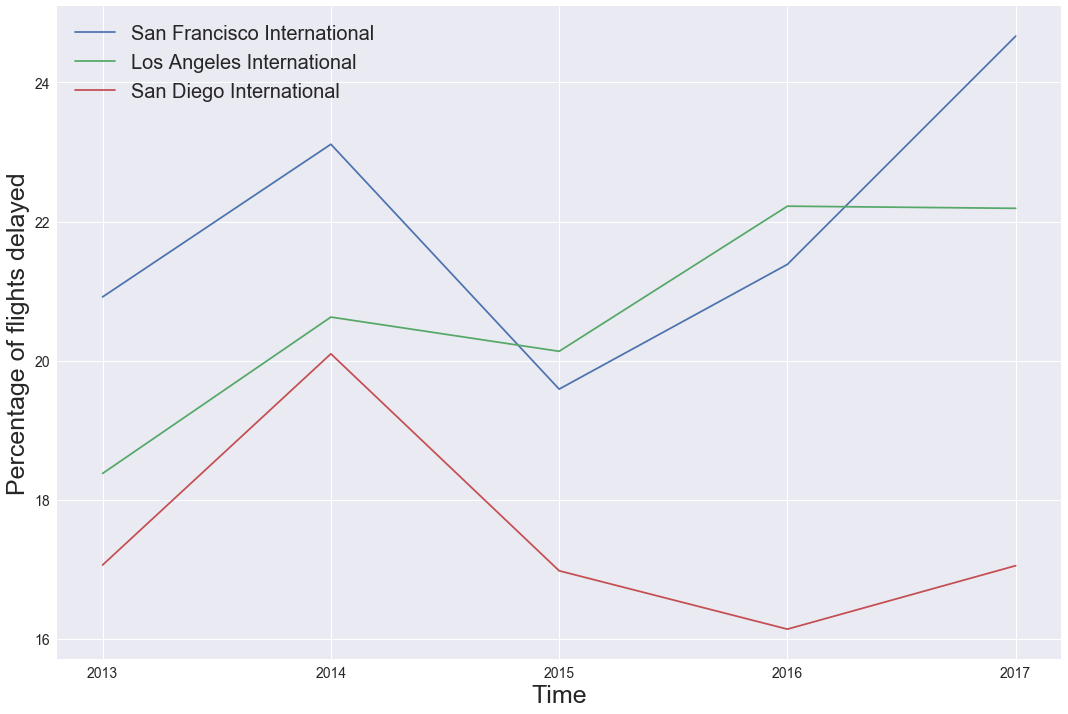

In [145]:
import numpy as np

plt.figure(figsize=(18,12))
plt.plot(sf_dep.index.year, sf_dep.values*100, label = "San Francisco International")
plt.plot(la_dep.index.year, la_dep.values*100, label = "Los Angeles International")
plt.plot(sd_dep.index.year, sd_dep.values*100, label = "San Diego International")

plt.xlabel('Time', fontsize = 25)
plt.ylabel('Percentage of flights delayed', fontsize = 25)

plt.xticks(np.arange(2013, 2018, step=1.0), fontsize = 14) 
plt.yticks(fontsize= 14 )

plt.legend(fontsize = 20)
plt.show()

From the graph above, it is evident that different airports vary considerably in their on-time performance of domestic flights. San Diego International airport exhibits consistently better performance then the other two busiest airports in California, as measured by passenger volume.

## On time performance distribution between different airlines

So far we have looked at on-time performance by year, between airports, and causes of delay.
Next we will look into on-time performance between airlines.  We will pick San Francisco International Airport for this exercise and see how arrival performance varies between airlines. Box plot constructed below to get a sense of the variance.

In [166]:
airlines_sf_dep = df.loc[df['ORIGIN_AIRPORT_ID'] == 14771, :].groupby('OP_UNIQUE_CARRIER').agg({'ARR_DEL15': 'mean'})
#airlines_sf_dep.columns = ["_".join(x) for x in airlines_sf_dep.columns.ravel()]

airlines_sf_dep['ARR_DEL15'] = 100*airlines_sf_dep 

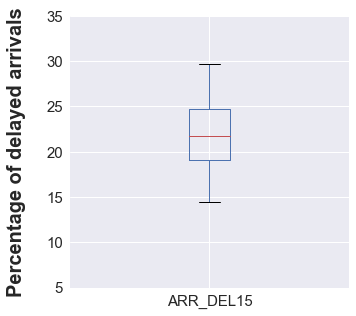

In [171]:
ax = airlines_sf_dep.boxplot(column='ARR_DEL15', figsize = (5,5),  return_type='axes', fontsize=15)

ax.set_ylim(5, 35)

# Set y-axis label
ax.set_ylabel("Percentage of delayed arrivals", labelpad=20, weight='bold', size=20)


plt.show()